<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Project%205/DNN_Optimizedv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

# install and import keras for neural network design and implementation

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, ReLU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# import keras objects for Convolution and import the dataset

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# load the datset into train and test sets

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


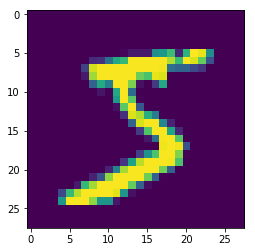

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# plotting a sample as image to get a visual feel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# reshaping the dataset to Convolution format, X_train.shape[0] --> # of images, (28, 28) --> input image resolution, 1 - # of channels(the image itself).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# converting the values into greyscale values.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
uniques, ids = np.unique(y_train, return_inverse=True)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Now we are going to optimize the network step by step to achieve max validation accuracy with less no. of parameters

# Good Network

In [11]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)       

In [12]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 248us/step - loss: 0.2039 - acc: 0.9354 - val_loss: 0.0523 - val_acc: 0.9829
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 183us/step - loss: 0.0614 - acc: 0.9812 - val_loss: 0.0354 - val_acc: 0.9878
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 185us/step - loss: 0.0460 - acc: 0.9856 - val_loss: 0.0403 - val_acc: 0.9858
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 185us/step - loss: 0.0410 - acc: 0.9873 - val_loss: 0.0293 - val_acc: 0.9899
Epoch 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# validation score on test data

In [14]:
print(score)

[0.020296607694547858, 0.9932]


## Inference
Now we are able to achieve the validation accuracy of 99.3% at the 17th epoch, this model is able perform very good in-terms of validation accuracy and has only around ~12k paramters

## Implementing Image Normalization

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

In [20]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation=None)) #24
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation=None)) # output 22
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1)) # output 11
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation=None)) # output 9
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation=None)) # output 7
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.1))


model.add(Convolution2D(7, 1, activation=None)) # output 7
model.add(BatchNormalization())
model.add(ReLU())
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation=None)`


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 16)       

# Adding Weight Decay to total loss

In [0]:
import keras.backend as K

def loss_with_reg(model, batch_size, _lambda = 0.001):
  reg_loss_sqr = 0
  for layer in model.layers:
    if len(layer.get_weights()) > 0:
      reg_loss_sqr += np.sum(layer.get_weights()[0]**2)
  reg_loss_sqr = reg_loss_sqr * (_lambda/2*batch_size)
  
  def temp(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred) + reg_loss_sqr
  return temp

In [0]:
batch_size = 64

In [0]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss=loss_with_reg(model=model, batch_size=64), optimizer=SGD(lr=0.003), metrics=['accuracy'])

In [34]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), steps_per_epoch=len(X_train) / batch_size,\
                            validation_data = datagen.flow(X_test, Y_test, batch_size=len(X_train)), validation_steps = 1 ,epochs=40, \
                            verbose = 1, workers=20)

Epoch 1/40
938/937 [==============================] - 21s 23ms/step - loss: 6.7373 - acc: 0.9714 - val_loss: 6.7198 - val_acc: 0.9771
Epoch 2/40
938/937 [==============================] - 18s 19ms/step - loss: 6.7335 - acc: 0.9718 - val_loss: 6.7150 - val_acc: 0.9781
Epoch 3/40
938/937 [==============================] - 18s 19ms/step - loss: 6.7308 - acc: 0.9732 - val_loss: 6.7105 - val_acc: 0.9795
Epoch 4/40
938/937 [==============================] - 18s 19ms/step - loss: 6.7273 - acc: 0.9738 - val_loss: 6.7082 - val_acc: 0.9804
Epoch 5/40
938/937 [==============================] - 17s 18ms/step - loss: 6.7245 - acc: 0.9743 - val_loss: 6.7074 - val_acc: 0.9803
Epoch 6/40
938/937 [==============================] - 17s 18ms/step - loss: 6.7220 - acc: 0.9755 - val_loss: 6.7034 - val_acc: 0.9813
Epoch 7/40
938/937 [==============================] - 17s 18ms/step - loss: 6.7195 - acc: 0.9758 - val_loss: 6.7041 - val_acc: 0.9811
Epoch 8/40
938/937 [==============================] - 17s 18ms

In [35]:
score = model.evaluate_generator(datagen.flow(X_test, Y_test, batch_size=len(X_test)), steps = 1)
print(score)

[6.676225185394287, 0.9889000058174133]


In [0]:
y_pred = model.predict_generator(datagen.flow(X_test, batch_size=len(X_test), shuffle = False),steps = 1)
y_pred = np.argmax(y_pred, axis=1)

## Missclassified Images

In [0]:
misclassified_index = [ind for ind,(i,j) in enumerate(zip(y_pred,y_test)) if i != j]

In [50]:
len(misclassified_index)

111

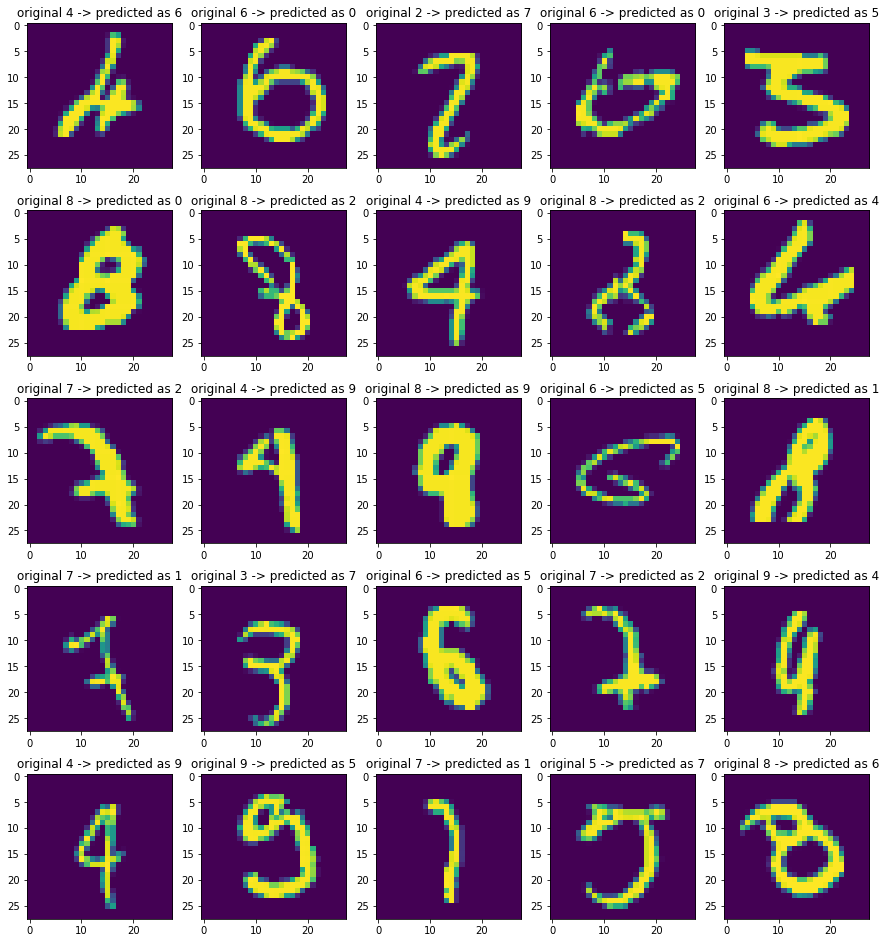

In [52]:
w=10
h=10
fig=plt.figure(figsize=(9, 9))
columns = 5
rows = 5

for i,ind in enumerate(misclassified_index[:25]):
  fig.add_subplot(5,5, i+1)
  plt.imshow(X_test[ind].reshape(28,28))  
  plt.title('original {} -> predicted as {}'.format(y_test[ind],y_pred[ind]))

plt.subplots_adjust(left=2, bottom=2, right=3.3, top=3.4, wspace=None, hspace=None)

plt.show()

In [0]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x
  
def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_227', model = None):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

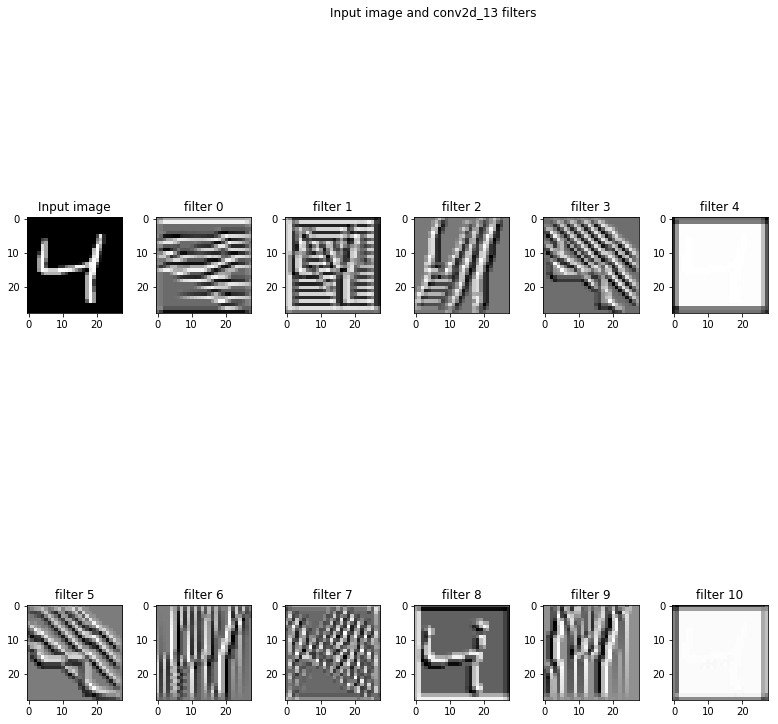

In [58]:
vis_img_in_filter(layer_name = model.layers[0].name, model = model)